Since a lot of data uses codes, I will be using the information given in the original paper "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records, https://doi.org/10.1155/2014/781670, for data cleaning and feature engineering.
Original data and mapping table can be found at: https://downloads.hindawi.com/journals/bmri/2014/781670.f1.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv("diabetic_data.csv") #loading the complete dataset
pd.options.display.max_columns = None

In [3]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In the paper it has been mentiond that original findings show a correlation between HbA1c and readmission. Glucose serum test
result is another important identifier. Hence, I will not be dropping these columns. Instead I will try to encode and populate the data.

The description for A1Cresult: Indicates the range of the result or if the test was not taken. Values: “>8” if the result
was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

The description of max_glu_serum: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,”
“normal,” and “none” if not measured 

In [5]:
#encoding A1Cresult
a1c_mapping = {'>7': 1, '>8': 1, 'Norm': 0}
diabetes_data['A1Cresult'] = diabetes_data['A1Cresult'].map(a1c_mapping)
diabetes_data['A1Cresult'] = diabetes_data['A1Cresult'].fillna(-1)

#encoding max_glu_serum
glu_serum_mapping = {'>200': 1, '>300': 1, 'Norm': 0}
diabetes_data['max_glu_serum'] = diabetes_data['max_glu_serum'].map(glu_serum_mapping)
diabetes_data['max_glu_serum'] = diabetes_data['max_glu_serum'].fillna(-1)

In [6]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,-1.0,-1.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,-1.0,-1.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
diabetes_data.shape

(101766, 50)

In [8]:
question_mark_counts = diabetes_data.apply(lambda x: x.value_counts().get('?', 0))

# Calculate the percentage of "?" in each column
percentage_question_mark = question_mark_counts / len(diabetes_data) * 100

# Print the columns and counts where the percentage is higher than 30%
for column, percentage in percentage_question_mark.items():
    if percentage > 30:
        print(f"Column: {column}, Count of '?': {question_mark_counts[column]}, Percentage: {percentage:.2f}%")

Column: weight, Count of '?': 98569, Percentage: 96.86%
Column: payer_code, Count of '?': 40256, Percentage: 39.56%
Column: medical_specialty, Count of '?': 49949, Percentage: 49.08%


In [9]:
#Dropping the columns that have a very high share of data missing
diabetes_data.drop(columns = ["weight","payer_code","medical_specialty"], inplace=True)

In [10]:
#dropping rows which have missing values, i.e. "?"
# Replace "?" with NaN
diabetes_data.replace("?", pd.NA, inplace=True)

# Drop rows with any NaN values
diabetes_data.dropna(inplace=True)

In [11]:
#removing an unvalid row
diabetes_data = diabetes_data[~diabetes_data.eq('Unknown/Invalid').any(axis=1)]

In [12]:
#Checking columns with zero variations in data
for column in diabetes_data.columns:
    unique_count = diabetes_data[column].nunique()
    print(f"Column {column}: {unique_count} unique values")

Column encounter_id: 98052 unique values
Column patient_nbr: 68629 unique values
Column race: 5 unique values
Column gender: 2 unique values
Column age: 10 unique values
Column admission_type_id: 8 unique values
Column discharge_disposition_id: 26 unique values
Column admission_source_id: 17 unique values
Column time_in_hospital: 14 unique values
Column num_lab_procedures: 118 unique values
Column num_procedures: 7 unique values
Column num_medications: 75 unique values
Column number_outpatient: 39 unique values
Column number_emergency: 33 unique values
Column number_inpatient: 20 unique values
Column diag_1: 713 unique values
Column diag_2: 740 unique values
Column diag_3: 786 unique values
Column number_diagnoses: 14 unique values
Column max_glu_serum: 3 unique values
Column A1Cresult: 3 unique values
Column metformin: 4 unique values
Column repaglinide: 4 unique values
Column nateglinide: 4 unique values
Column chlorpropamide: 4 unique values
Column glimepiride: 4 unique values
Colum

In [13]:
#Dropping columns that have no value changes (examide and citoglipton)
diabetes_data.drop(columns=["examide","citoglipton","metformin-rosiglitazone"], inplace=True)

In [14]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-1.0,-1.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-1.0,-1.0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,-1.0,-1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,>30


In [15]:
diabetes_data.shape

(98052, 44)

I will be using the mapping table to bucket some instances together, while also remove patients whose discharge disposition was a result of death or hospice

In [16]:
# Values to exclude (Hospice/Deatht)
values_to_exclude = [11, 13, 14, 19, 20, 21]

# Filter the DataFrame
diabetes_data = diabetes_data[~diabetes_data['discharge_disposition_id'].isin(values_to_exclude)]

# Reset the index
diabetes_data.reset_index(drop=True, inplace=True)

In [17]:
pd.options.mode.chained_assignment = None

# Define mapping dictionaries
admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
discharge_disposition_mapping = {6: 1, 8: 1, 9: 1, 3: 2, 4: 2, 5: 2, 22: 2, 23: 2, 24: 2, 12: 10, 15: 10, 16: 10, 17: 10, 18: 25, 26: 25}
admission_source_mapping = {2: 1, 3: 1, 5: 4, 6: 4, 10: 4, 22: 4, 25: 4, 15: 9, 17: 9, 20: 9, 21: 9, 13: 11, 14: 11}

# Apply mapping to the DataFrame
diabetes_data['admission_type_id'] = diabetes_data['admission_type_id'].replace(admission_type_mapping)
diabetes_data['discharge_disposition_id'] = diabetes_data['discharge_disposition_id'].replace(discharge_disposition_mapping)
diabetes_data['admission_source_id'] = diabetes_data['admission_source_id'].replace(admission_source_mapping)


In [18]:
#encoding some more columns including all medicines

meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Define mapping dictionaries
gender_mapping = {'Male': 1, 'Female': 0}
change_mapping = {'Ch': 1, 'No': 0}
diabetes_med_mapping = {'Yes': 1, 'No': 0}
medication_mapping = {'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1}

# Apply mapping to the DataFrame
diabetes_data['gender'] = diabetes_data['gender'].replace(gender_mapping)
diabetes_data['change'] = diabetes_data['change'].replace(change_mapping)
diabetes_data['diabetesMed'] = diabetes_data['diabetesMed'].replace(diabetes_med_mapping)

# Apply mapping for medications using a loop
for col in meds:
    diabetes_data[col] = diabetes_data[col].replace(medication_mapping)

As the original paper mentions "Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise,” which covers both readmission after 30 days and no readmission at all"; I will be encoding the values in the same way, into a binary classification problem.

In [19]:
diabetes_data['readmitted'] = diabetes_data['readmitted'].replace('>30', 0)
diabetes_data['readmitted'] = diabetes_data['readmitted'].replace('<30', 1)
diabetes_data['readmitted'] = diabetes_data['readmitted'].replace('NO', 0)

In [20]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,35754,82637451,Caucasian,1,[50-60),1,1,1,3,31,6,16,0,0,0,414,411,250,9,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


The mapping of the diagnosis code is also based on the desciption provided in the original paper

In [21]:
# Function to map diagnosis code to groups based on ranges
def map_diagnosis_to_group(diag_code):
    diag_code = str(diag_code)  # Ensure the code is a string
    
    if diag_code.startswith(('E', 'V')):
        return 'Other'
    else:
    
        code = int(diag_code.split('.')[0]) if '.' in diag_code else int(diag_code)

        if 390 <= code <= 459 or code == 785:
            return 'Circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'Respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'Digestive'
        elif code == 250:
            return 'Diabetes'
        elif 800 <= code <= 999:
            return 'Injury'
        elif 710 <= code <= 739:
            return 'Musculoskeletal'
        elif 580 <= code <= 629 or code == 788:
            return 'Genitourinary'
        elif 140 <= code <= 239 or (780 <= code <= 799 and code not in [781, 784]) or 240 <= code <= 279 or 680 <= code <= 709 or code == 782:
            return 'Neoplasms'
        elif 1 <= code <= 139 or 290 <= code <= 319 or 280 <= code <= 289 or 320 <= code <= 359 or 630 <= code <= 679 or 360 <= code <= 389 or 740 <= code <= 759:
            return 'Other'
        else:
            return 'Other'

# Apply the mapping to create a new grouped column for each diag column
for diag_column in ['diag_1', 'diag_2', 'diag_3']:
    diabetes_data[f'{diag_column}_group'] = diabetes_data[diag_column].apply(map_diagnosis_to_group)

diabetes_data.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)


In [22]:
#using label encoder for encoding
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['diag_1_group','diag_2_group','diag_3_group','race']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    diabetes_data[column] = label_encoder.fit_transform(diabetes_data[column])

In [23]:
diabetes_data['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [24]:
# converting age range to middle values
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Apply mapping to the 'age' column
diabetes_data['age'] = diabetes_data['age'].map(age_mapping)

In [25]:
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_group,diag_2_group,diag_3_group
0,149190,55629189,2,0,15,1,1,7,3,59,0,18,0,0,0,9,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,6,1,6
1,64410,86047875,0,0,25,1,1,7,2,11,5,13,2,0,1,6,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,1,7
2,500364,82442376,2,1,35,1,1,7,2,44,1,16,0,0,0,7,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,7,1,0
3,16680,42519267,2,1,45,1,1,7,1,51,0,8,0,0,0,5,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,6,6,1
4,35754,82637451,2,1,55,1,1,1,3,31,6,16,0,0,0,9,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


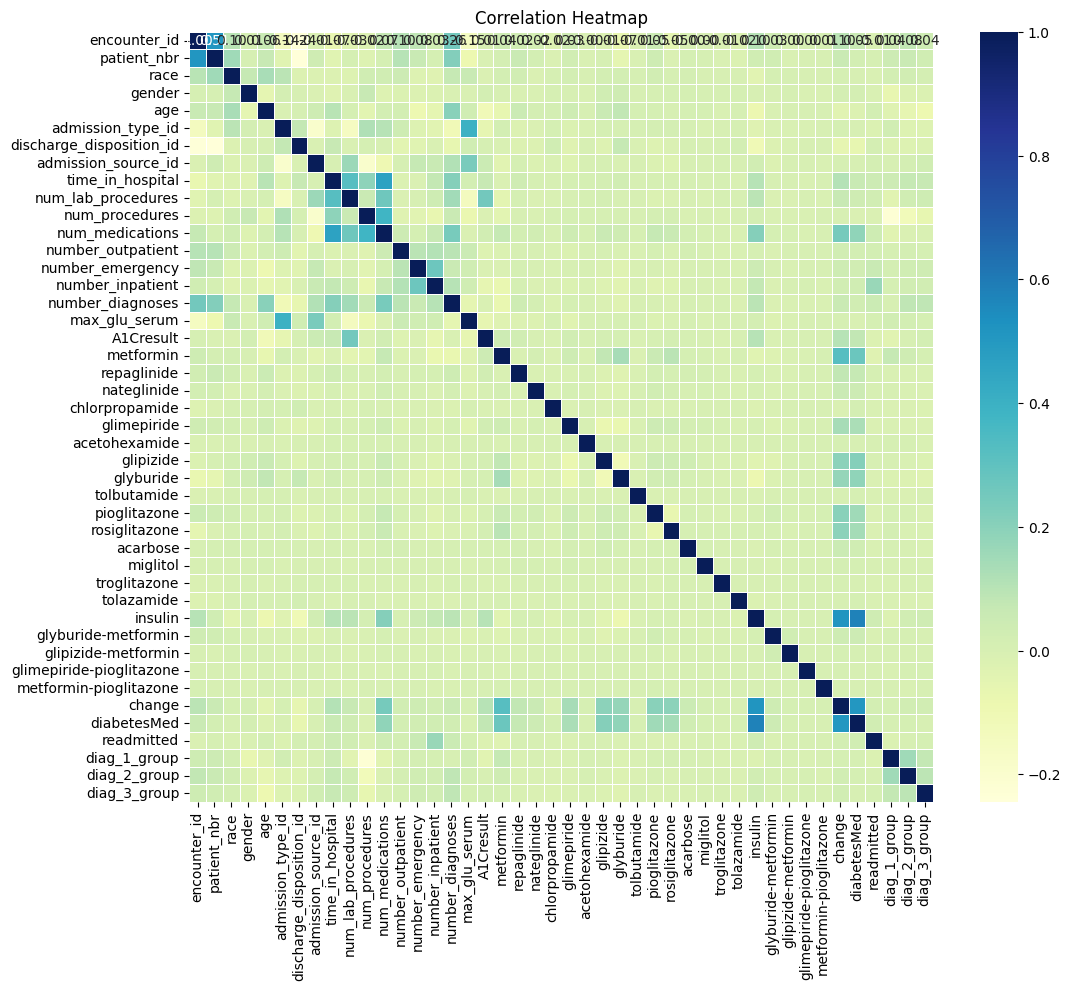

In [26]:
#Correlation Matrix
correlation_matrix = diabetes_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn with a light color palette
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

Training and testing the machine learning models for classification, i.e. Random Forest and XGBR

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = diabetes_data.drop(['readmitted'], axis=1)  # Features
y = diabetes_data['readmitted']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardizing completed!")

# Random Forest
rf_model = RandomForestClassifier(random_state=110)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# XGBoost
xgb_model = XGBClassifier(random_state=110)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))


Standardizing completed!
Random Forest Accuracy: 0.88513195714659
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16932
           1       0.59      0.01      0.01      2203

    accuracy                           0.89     19135
   macro avg       0.74      0.50      0.48     19135
weighted avg       0.85      0.89      0.83     19135

XGBoost Accuracy: 0.8839299712568591
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     16932
           1       0.43      0.03      0.05      2203

    accuracy                           0.88     19135
   macro avg       0.66      0.51      0.49     19135
weighted avg       0.83      0.88      0.84     19135



From the results, we can see the recall value is very low for class 0 and the overall predictions for class 1 is poor. This is owing to low number of occurances in class 1 (class imbalance). I will use SMOTE to try and balance

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=110)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 67717, 1: 8820})
New dataset shape Counter({0: 67717, 1: 67717})


In [29]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input_new)
X_test_scaled = scaler.transform(X_test)

print("Standardizing completed!")

# Random Forest
rf_model.fit(X_train_scaled, train_output_new)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# XGBoost
xgb_model.fit(X_train_scaled, train_output_new)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

Standardizing completed!
Random Forest Accuracy: 0.8595244316697151
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     16932
           1       0.19      0.07      0.10      2203

    accuracy                           0.86     19135
   macro avg       0.54      0.52      0.51     19135
weighted avg       0.81      0.86      0.83     19135

XGBoost Accuracy: 0.8737392213221845
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     16932
           1       0.27      0.06      0.10      2203

    accuracy                           0.87     19135
   macro avg       0.58      0.52      0.51     19135
weighted avg       0.82      0.87      0.84     19135



Training and testing a deep learning model to predict binary classes

In [32]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for readmission
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, train_output_new, epochs=20, batch_size=64)

# Evaluate the model on the test set
keras_predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print("Deep Learning Test Accuracy:", accuracy_score(y_test, keras_predictions))
print("Deep Learning Test Classification Report:\n", classification_report(y_test, keras_predictions))


Epoch 1/20
2117/2117 [==============================] - 7s 3ms/step - loss: 0.5448 - accuracy: 0.7308
Epoch 2/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4849 - accuracy: 0.7687
Epoch 3/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4653 - accuracy: 0.7801
Epoch 4/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4545 - accuracy: 0.7876
Epoch 5/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4462 - accuracy: 0.7940
Epoch 6/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4386 - accuracy: 0.7985
Epoch 7/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4344 - accuracy: 0.8002
Epoch 8/20
2117/2117 [==============================] - 7s 3ms/step - loss: 0.4296 - accuracy: 0.8032
Epoch 9/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.4260 - accuracy: 0.8056
Epoch 10/20
2117/2117 [==============================] - 6s 3ms/step - loss: 0.422

While the precision of class 1 did decrease, we can clearly see a massive improvement in class 0 recall for all 3 models.

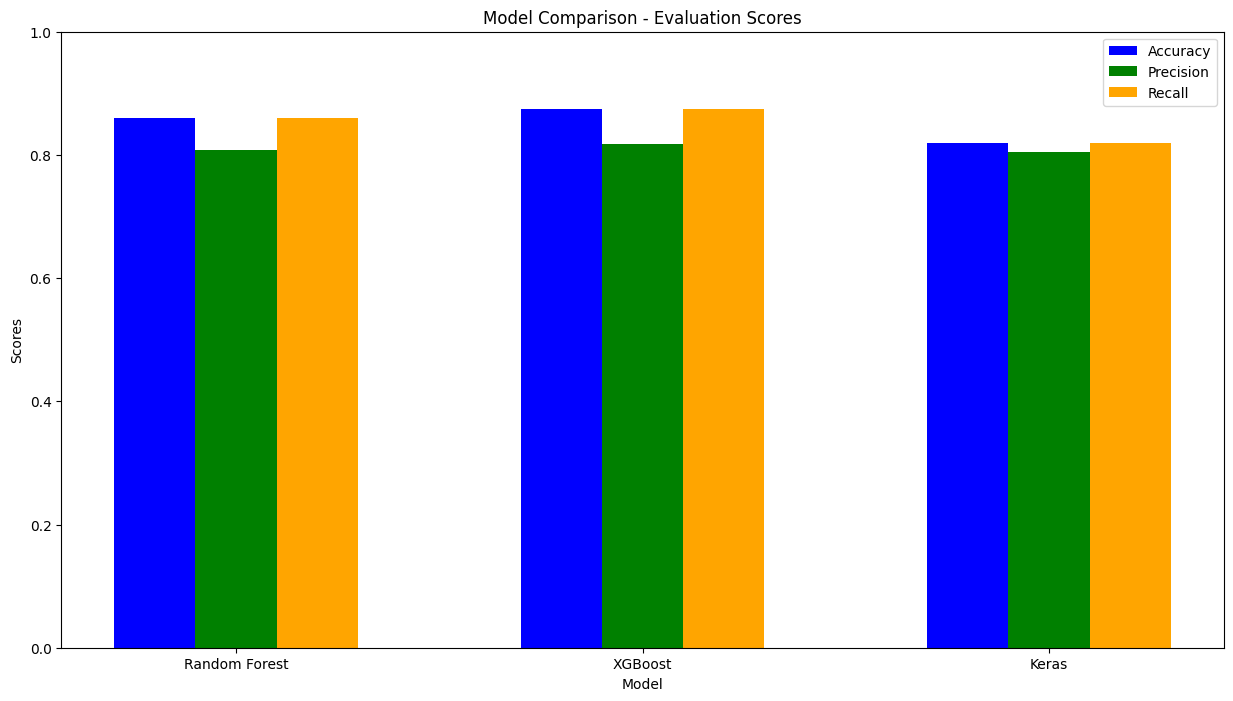

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall for each model
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
keras_accuracy = accuracy_score(y_test, keras_predictions)

rf_precision = precision_score(y_test, rf_predictions, average='weighted')
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
keras_precision = precision_score(y_test, keras_predictions, average='weighted')

rf_recall = recall_score(y_test, rf_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
keras_recall = recall_score(y_test, keras_predictions, average='weighted')

# Model names
models = ['Random Forest', 'XGBoost', 'Keras']

# Corresponding scores
accuracy_scores = [rf_accuracy, xgb_accuracy, keras_accuracy]
precision_scores = [rf_precision, xgb_precision, keras_precision]
recall_scores = [rf_recall, xgb_recall, keras_recall]

# Create a bar graph for all scores
plt.figure(figsize=(15, 8))

plt.bar(np.arange(len(models)) - 0.2, accuracy_scores, width=0.2, label='Accuracy', color='blue')
plt.bar(np.arange(len(models)), precision_scores, width=0.2, label='Precision', color='green')
plt.bar(np.arange(len(models)) + 0.2, recall_scores, width=0.2, label='Recall', color='orange')

plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization
plt.title('Model Comparison - Evaluation Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(np.arange(len(models)), models)
plt.legend()
plt.show()
